In [1]:
from movielens_analysis import Links, Movies, visualize_dict

# Первые методы вспомогательные и не возвращают полезной информации

%timeit links = Links('ml-latest-small/links.csv')
links = Links('ml-latest-small/links.csv')
%timeit -n1 -r1 links.get_imdb(['1'], ['Director']) # Флаги -n1 -r1 чтобы запустить и затаймить код 1 раз, чтобы не спамить GET реквесты
tsd = links.get_imdb(['1'], ['Director'])[0][1][0]  # Смотрю на IMDB режиссера фильма с первым id (История Игрушек)
print(f'Режиссер Истории Игрушек это {tsd}')

%timeit links.calculate_budget('CA$1234')
converted_currency = links.calculate_budget('CA$1234')
print(f'1234 канадских долларов это {converted_currency} долларов')

%timeit links.links_file_reader('ml-latest-small/links.csv')
toy_story_ids = next(links.links_file_reader('ml-latest-small/links.csv')) # Обращаюсь к генератору за следующей строкой с id

%timeit movies = Movies('ml-latest-small/movies.csv')
movies = Movies('ml-latest-small/movies.csv')

%timeit movies.movies_file_reader('ml-latest-small/movies.csv')

2.83 ms ± 74.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Режиссер Истории Игрушек это John Lasseter
910 ns ± 5.42 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1234 канадских долларов это 913.16 долларов
119 ns ± 4.11 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
43.9 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
125 ns ± 3.48 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


13.4 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


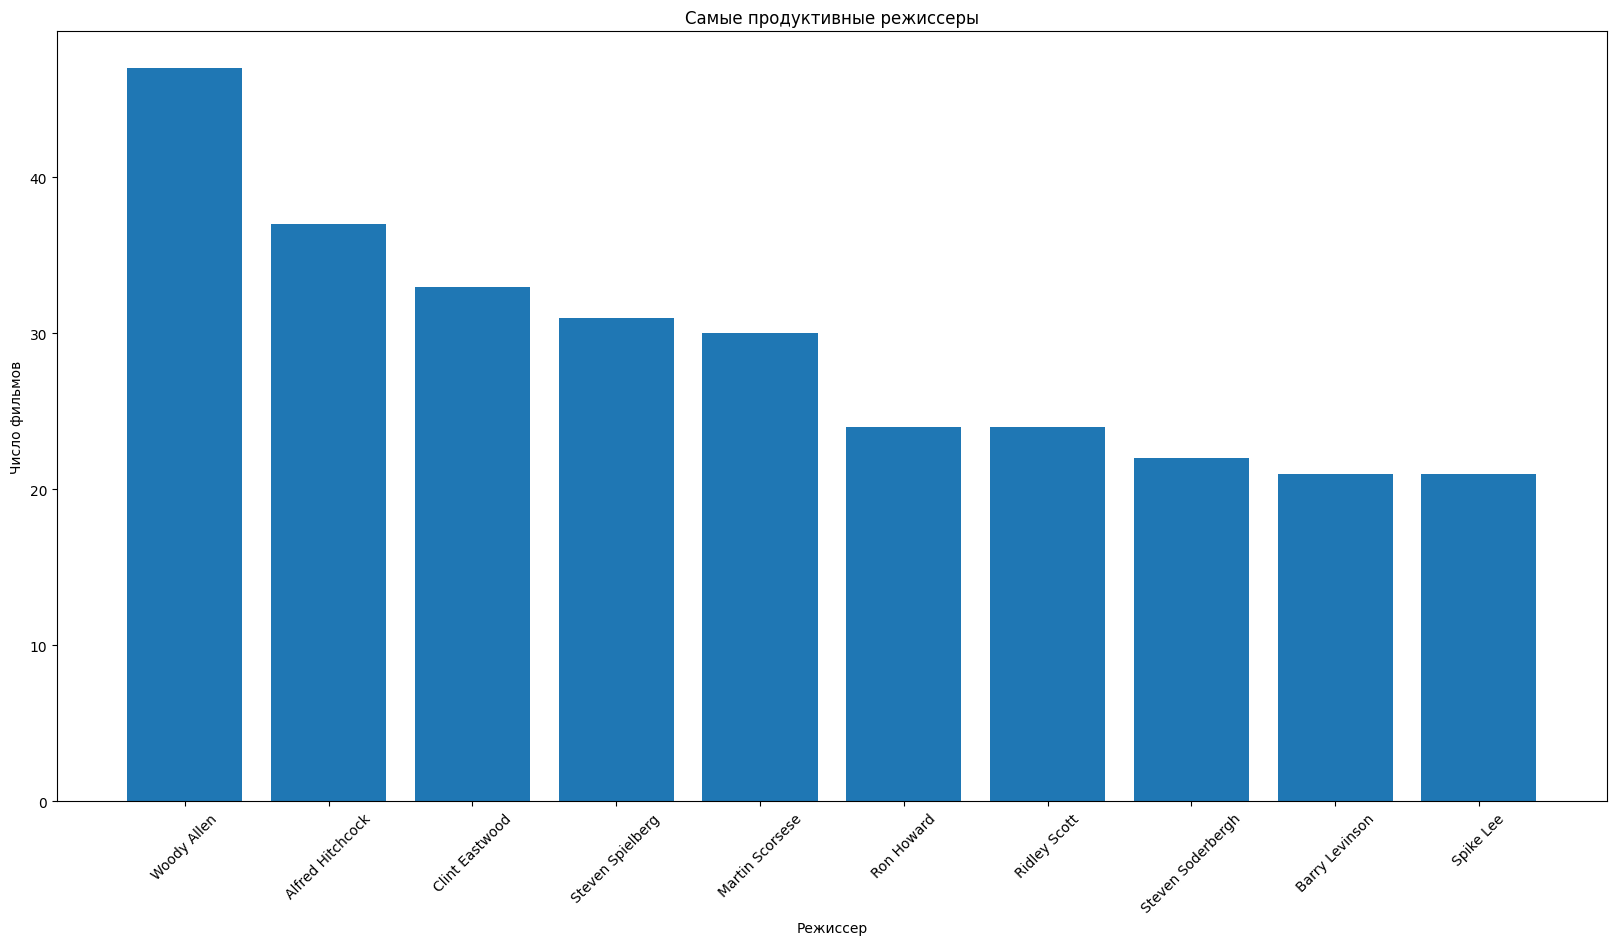

147 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [2]:
%timeit links.top_directors(10)
data = links.top_directors(10)
%timeit -n1 -r1 visualize_dict(data, "Режиссер", "Число фильмов", "Самые продуктивные режиссеры")

Можем видеть, что самые продуктивные режиссеры в истории кинематографа сняли около 30 фильмов с некоторым разбросом, исключение составил Вуди Аллен с выдающимся рекордом в 47 фильмов.

13.6 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


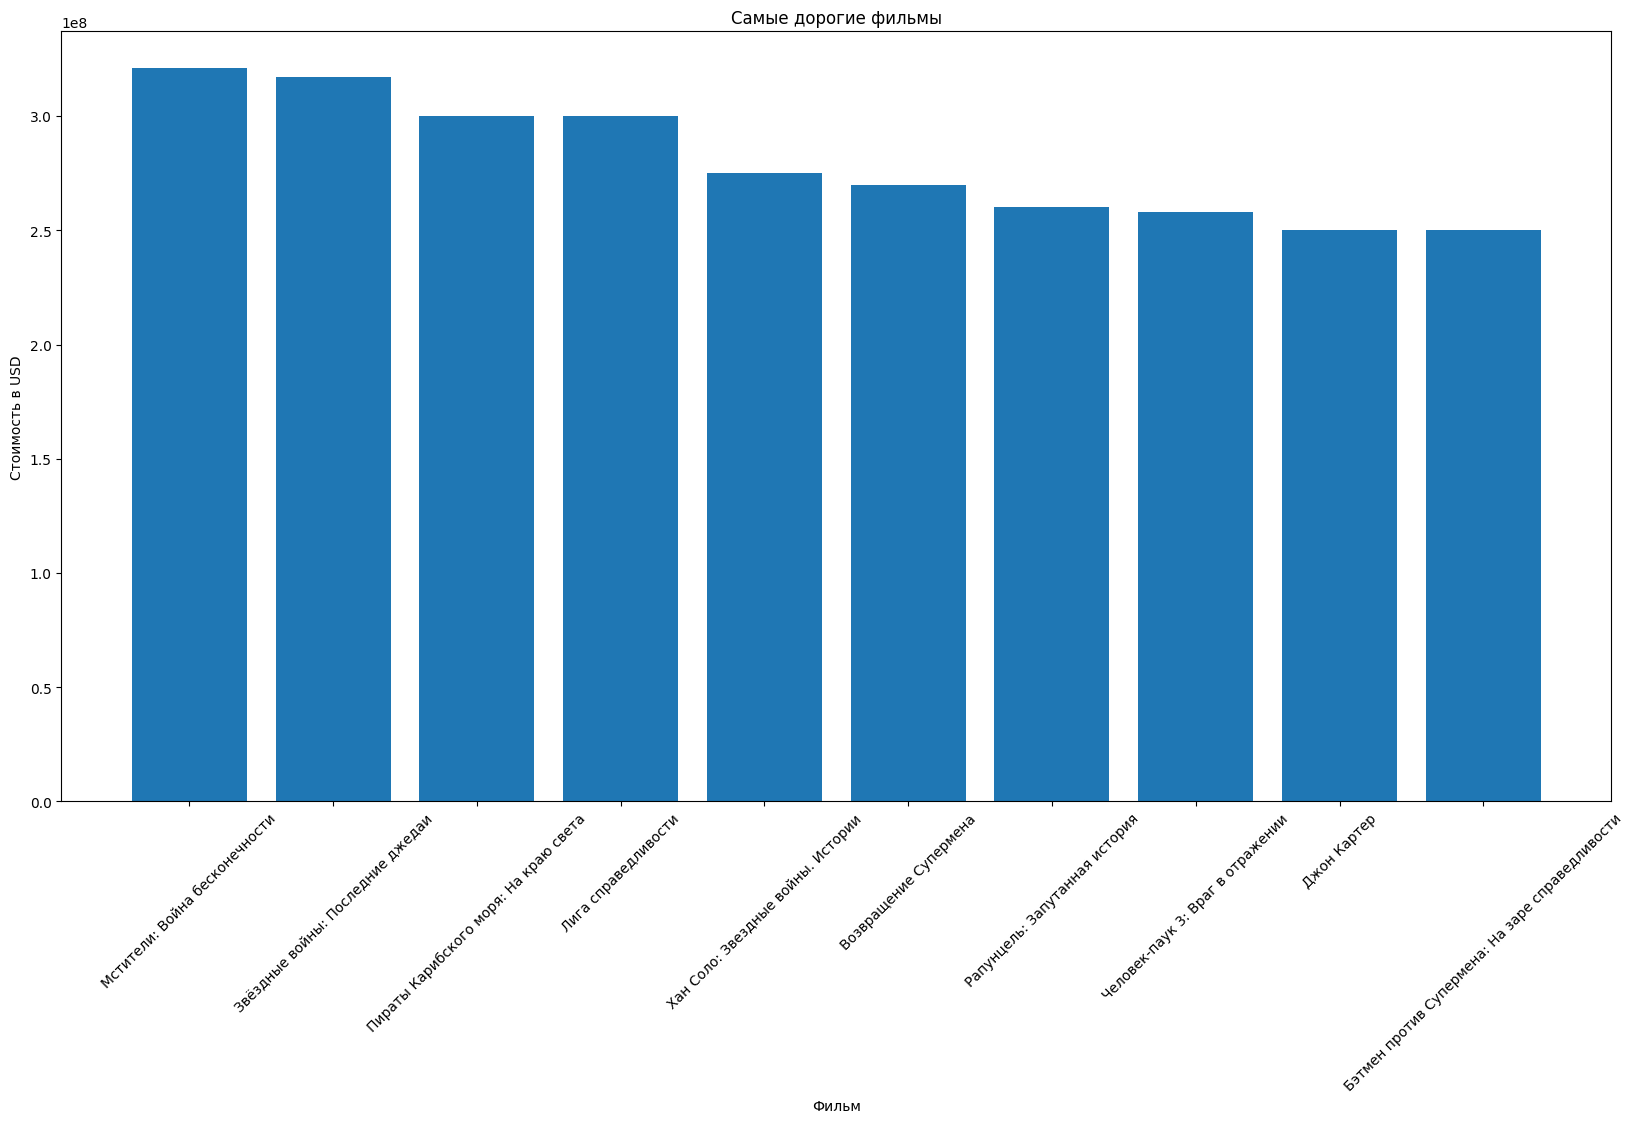

13.6 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


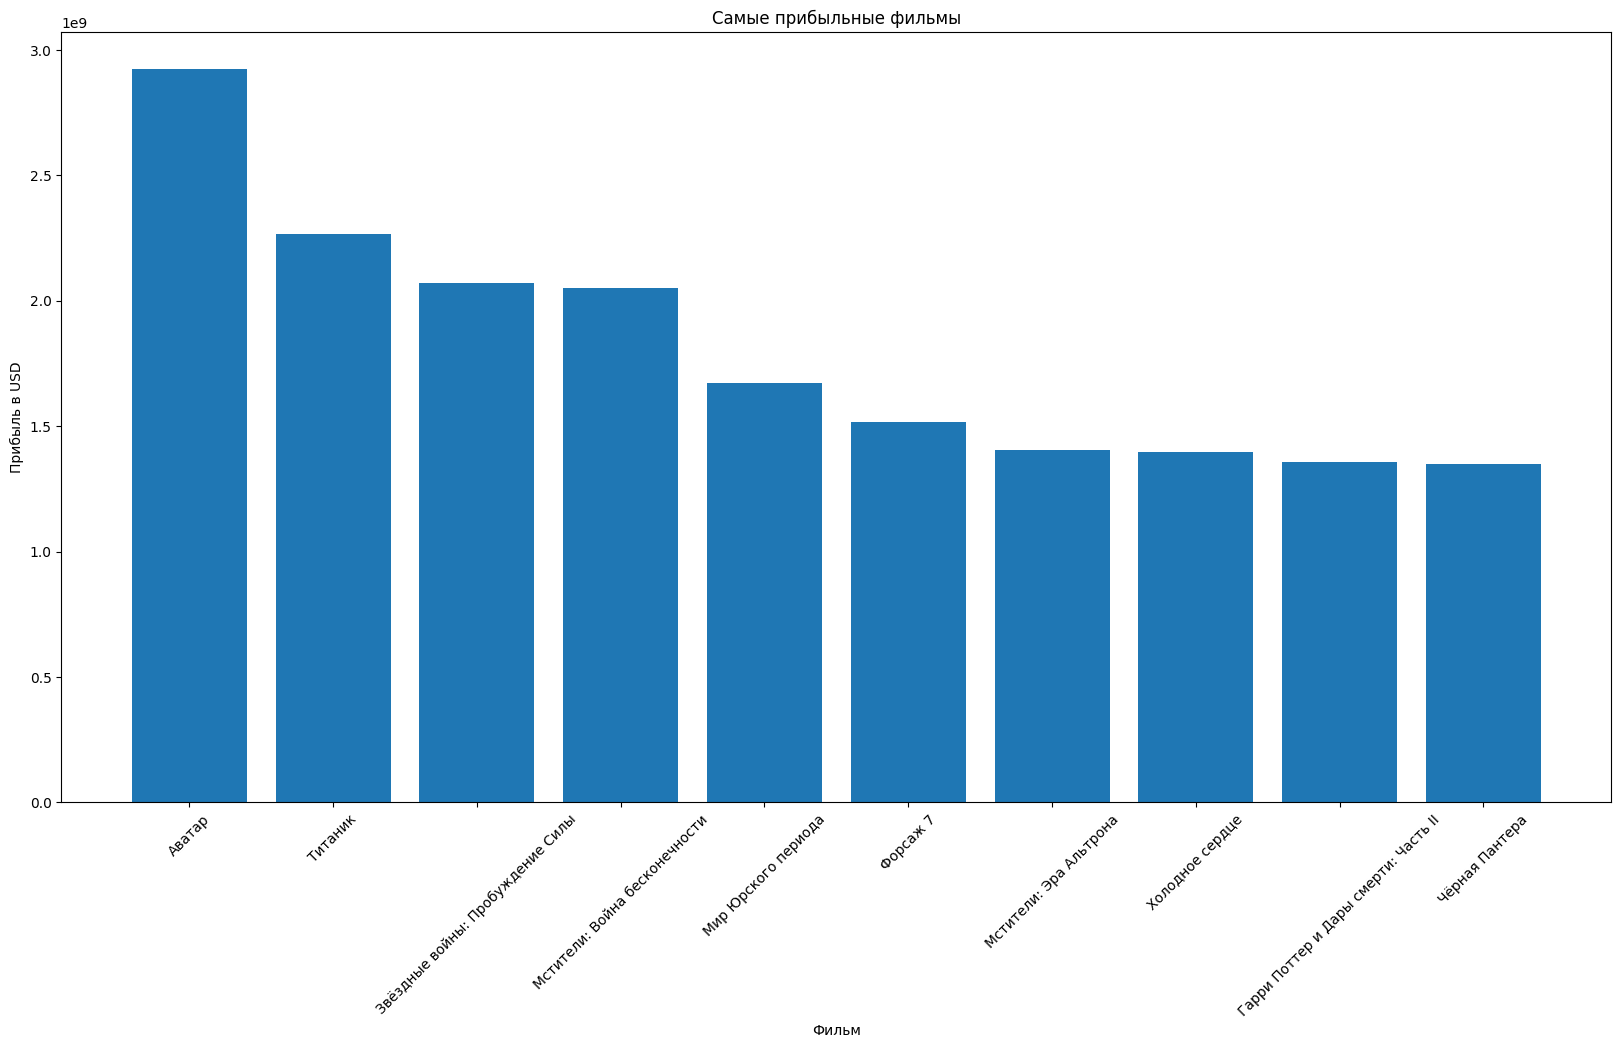

17.7 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


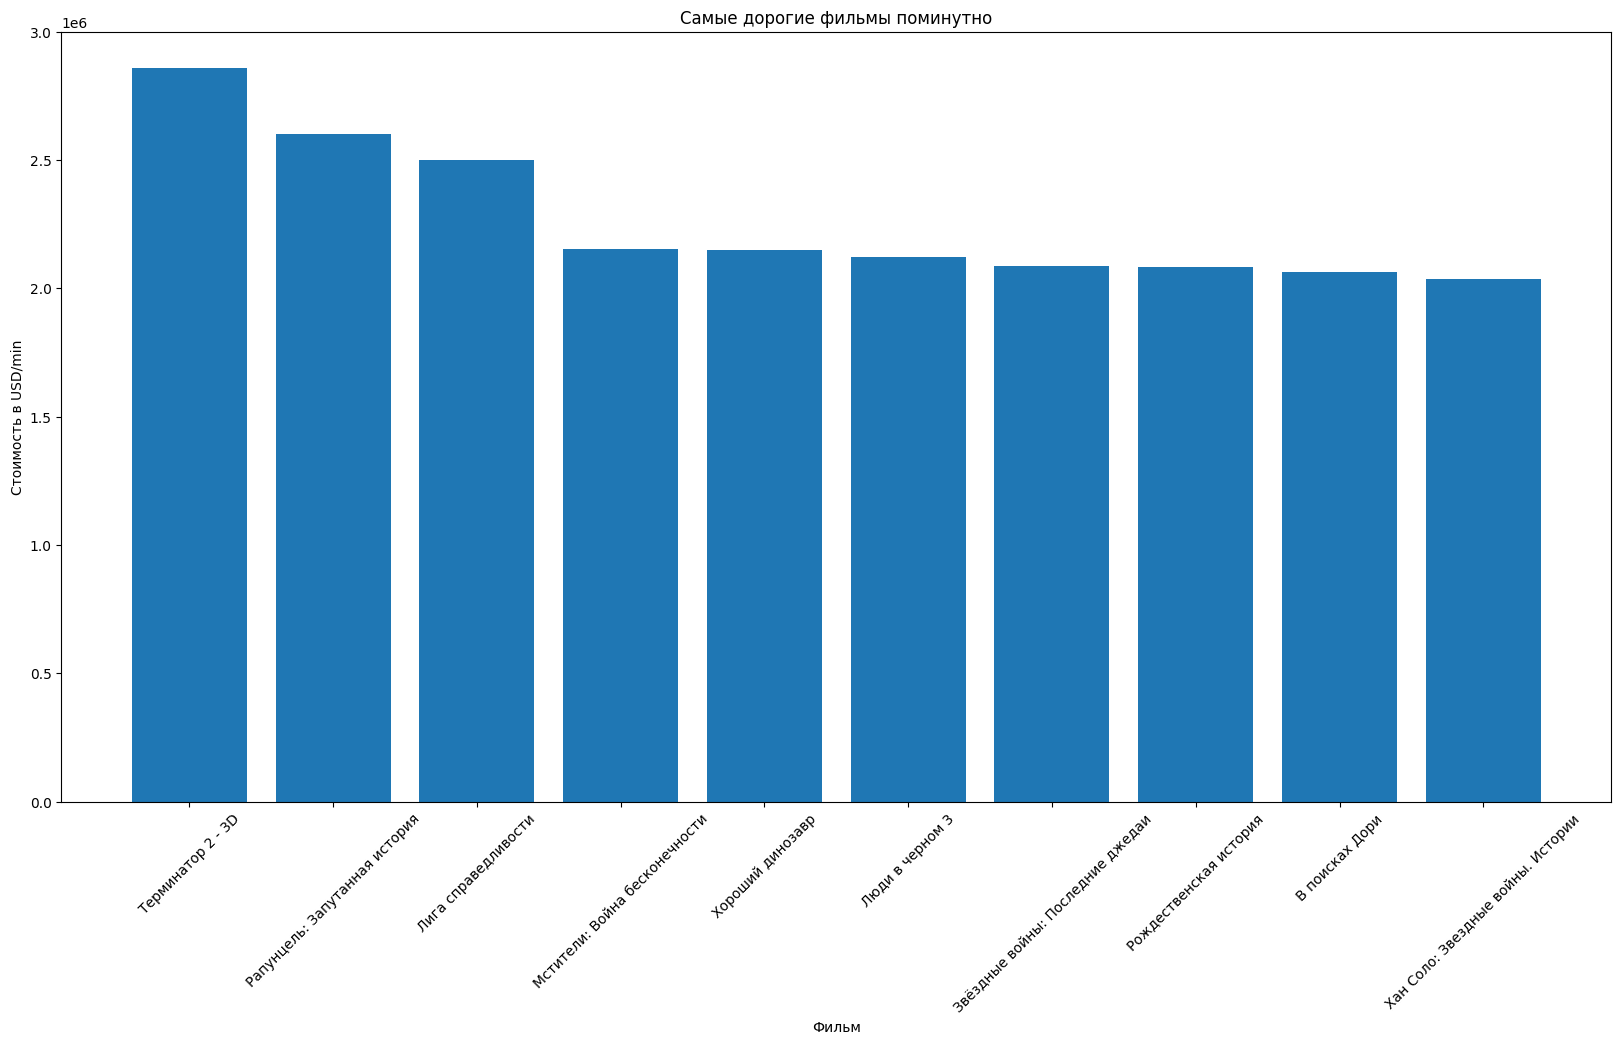

In [3]:
%timeit links.most_expensive(10)
data = links.most_expensive(10)
visualize_dict(data, "Фильм", "Стоимость в USD", "Самые дорогие фильмы")

%timeit links.most_profitable(10)
data = links.most_profitable(10)
visualize_dict(data, "Фильм", "Прибыль в USD", "Самые прибыльные фильмы")

%timeit links.top_cost_per_minute(10)
data = links.top_cost_per_minute(10)
visualize_dict(data, "Фильм", "Стоимость в USD/min", "Самые дорогие фильмы поминутно")

Графики выше показывают, что 2 самые кассовые ленты в истории кинематографа это оригинальные картины (Аватар и Титаник), при этом самые дорогие фильмы -- это почти всегда сиквел большой франшизы. Так, 8 из 10 самых дорогих фильмов это сиквелы франшиз DC Comics, Star Wars, Pirates of the Carribean, MCU.

При этом, если пересчитать стоимость каждой минуты хронометража для каждого фильма, то в десятку лидеров попадают сразу 4 мультипликационные киноленты (Рапунцель, Хороший динозавр, Рождественская история, В поисках Дори), что говорит о более заметной корелляции хронометража анимационных фильмов и их стоимости.

19.9 ms ± 530 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


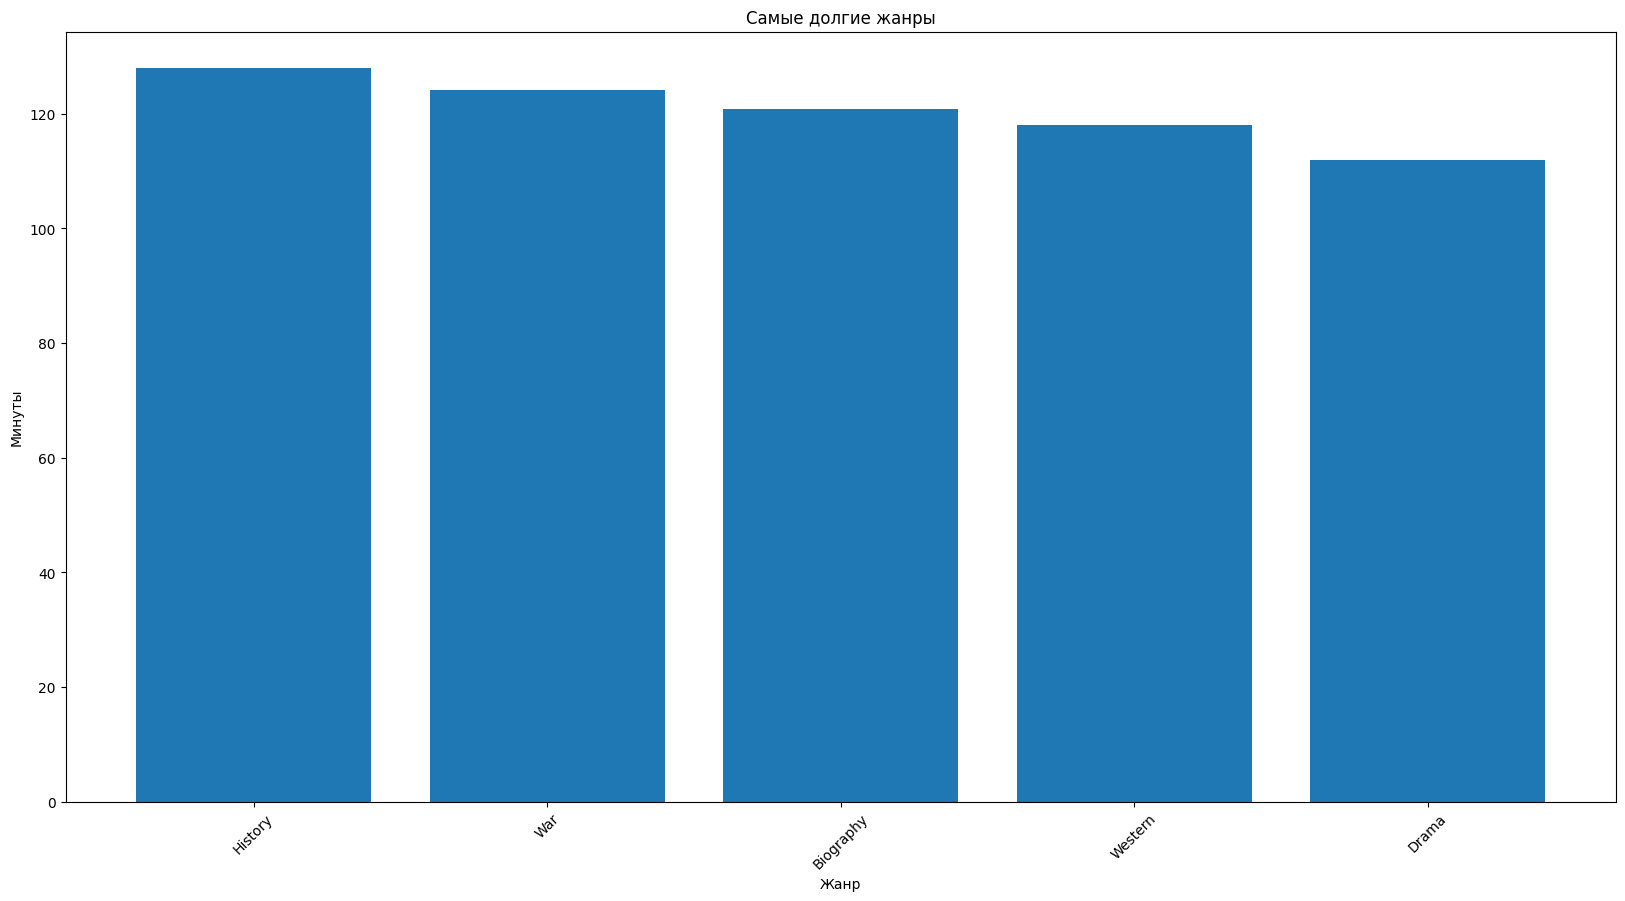

In [4]:
%timeit links.longest_by_genre(5)
data = links.longest_by_genre(5)
visualize_dict(data, "Жанр", "Минуты", "Самые долгие жанры")

Жанрами с самым долгим средним хронометражем оказались 'History', 'War' и 'Biography'. Все 3 жанра имеют отношение к документалистике, которая предполагает глубину исследования. Т.к. реальность зачастую является многослойной и сложной, всестороннее освещение темы требует большего хронометража, даже если фильм художественный.

294 µs ± 4.58 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


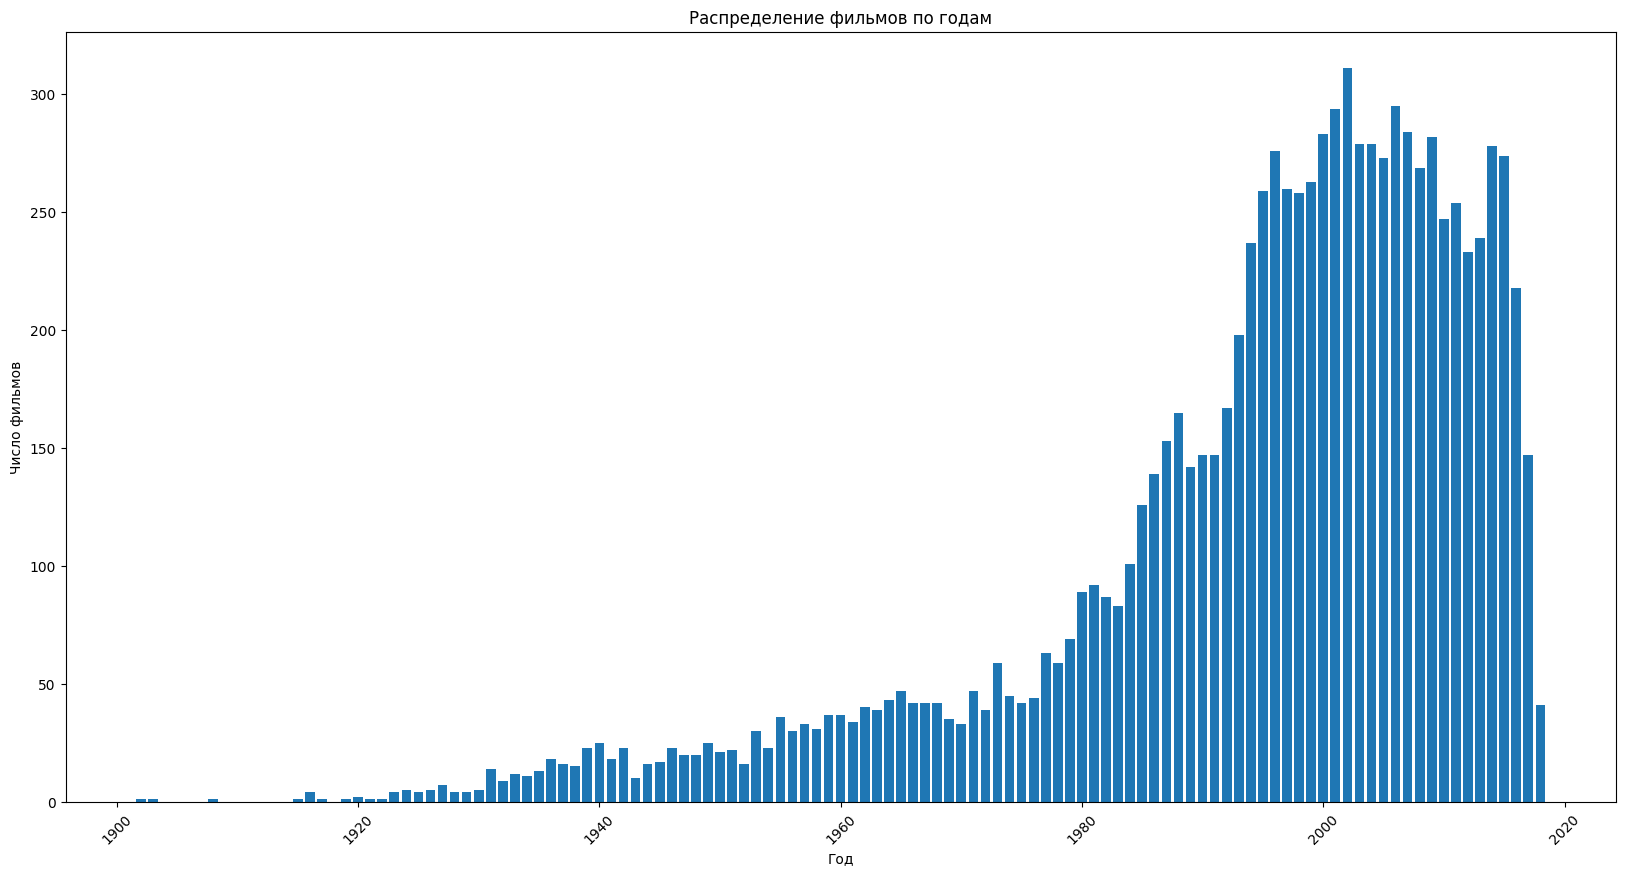

In [5]:
%timeit movies.dist_by_release()
data = movies.dist_by_release()
visualize_dict(data, "Год", "Число фильмов", "Распределение фильмов по годам")

На графике видно, что в 80-х и 90-х произошел резкий скачок в производстве кинематографа. Это связано в первую очередь с технологическими инновациями. В 1980-х годах появилось домашнее видео, включая видеомагнитофоны и видеокассеты, что позволило зрителям смотреть фильмы в удобное для них время и в удобном месте.
С 1990-х годов развитие Интернета привело к появлению онлайн-кинотеатров и стриминговых сервисов, что сделало фильмы еще более доступными для зрителей.

Эти технологические инновации не только упростили доступ к кинематографу, но и расширили возможности для создания и распространения фильмов.

3.57 ms ± 97.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


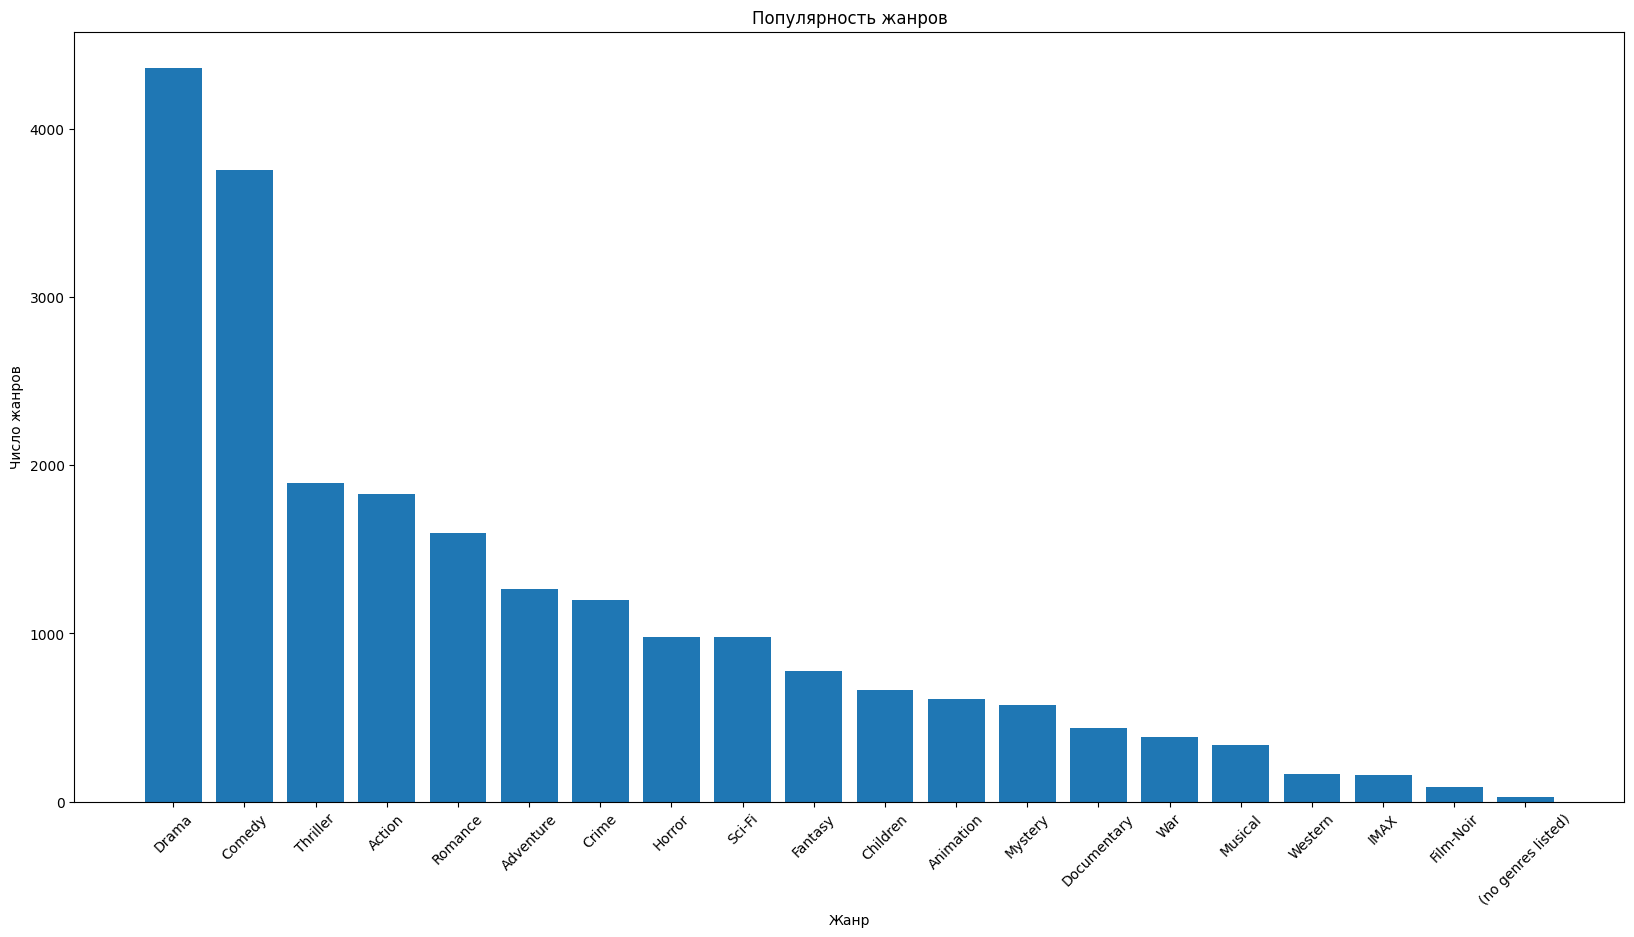

In [6]:
%timeit movies.dist_by_genres()
data = movies.dist_by_genres()
visualize_dict(data, "Жанр", "Число жанров", "Популярность жанров")

Драма и комедия -- 2 самых популярных жанра с большим отрывом. Полагаю, что дело в универсальности этих жанров, неслучайно они выделялись как 2 первородных жанра в театре, обозначенные еще Аристотелем, со своими свойствами и структурой. 

В силу своей универсальности, они могут быть представлены в разных поджанрах или в комбинации с другими жанрами, например, фильм категории "романтика" почти всегда будет в паре с драмой, приключения часто предполагают комедию и т.д.

In [7]:
%timeit movies.trends_over_time()
data = movies.trends_over_time()
for k, v in data.items():
    print(f'Десятилетие: {k}')
    print(f'Топ-3 жанров: {v[0]}, {v[1]}, {v[2]}\n')

31.9 ms ± 697 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Десятилетие: 1900-1909
Топ-3 жанров: Sci-Fi, Action, Adventure

Десятилетие: 1910-1919
Топ-3 жанров: Drama, Comedy, War

Десятилетие: 1920-1929
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 1930-1939
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 1940-1949
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 1950-1959
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 1960-1969
Топ-3 жанров: Drama, Comedy, Adventure

Десятилетие: 1970-1979
Топ-3 жанров: Drama, Comedy, Action

Десятилетие: 1980-1989
Топ-3 жанров: Comedy, Drama, Action

Десятилетие: 1990-1999
Топ-3 жанров: Drama, Comedy, Romance

Десятилетие: 2000-2009
Топ-3 жанров: Drama, Comedy, Thriller

Десятилетие: 2010-2019
Топ-3 жанров: Comedy, Drama, Action



По результатам анализа видно, что драма и комедия всегда оставались самыми доминирующими жанрами на протяжении всей истории кинематографа.

Интересно заметить, что всю первую половину 20 века тройку популярнейших жанров замыкала романтика.

70-80е были временем боевиков, когда Голливуд начал превращать кино в сферу развлечений. Многие актеры стали символами этого времени, а технологии и рост бюджетов позволили отойти от жанра романтики, который опирался на эмоциональную привлекательность.

Популярность action-фильмов в 2010х годах объясняется появлением реалистичных спецэффектов, а также успехом таких франшиз, как "Мстители" и "Форсаж". 